# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения
* Дискретный прямоугольный скачок: $ \begin{equation*} \sigma_{d}(k) = \begin{cases}
1, k \geq 0  \\
0, k < 0 \\
\end{cases}
\end{equation*} $
* Дискретный прямоугольный импульс: $ \begin{equation*} s_{1}(x)= \begin{cases}
U, n_{0}\leq k  \leq n_{0} + n_{imp} - 1  \\
0, иначе \\
\end{cases}
\end{equation*} $
* Среднее значение сигнала на интервале времени $[0, T]$:  
  (T - величина периода функции):  
  $\frac{1}{T}\int_0^T s(t)dt $. Дискретный случай: $\frac{1}{T} \sum_{k=0}^{T} s(k)$
* Средняя мощность сигнала на интервале времени $[0, T]$: $P_{ср} = \frac{1}{T}\int_0^T s^{2}(t)dt $.  Дискретный случай: $\frac{1}{T} \sum_{k=0}^{T} s(k)^{2}$
* Энергия сигнала на отрезке интервале времени $[0, T]$: $\int_0^T s^{2}(t)dt$. Дискретный случай: $ \sum_{k=0}^{T} s(k)^{2} $
* Дискретный сигнал $s_{a}(k)$ с экспоненциальной огибающей $ \mid a \mid^{k}$:  
   $s_{a}(k)$ = $ \mid a \mid^{k} s_{b}(k)$, где $ s_{b}(k)$ - некоторый дискретный сигнал 

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Константы
Nb = 1
N = 30 + Nb % 5
a = ((-1)**Nb)*(0.8 + 0.005*(Nb % 20))
C = 1 + Nb % 5
w0 = np.pi/(6 + Nb % 5)
U = Nb % 20 + 1
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi/(4 + Nb % 5)
w2 = np.pi/(8 + Nb % 5)
w3 = np.pi/(16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
print("Nb = {}, N = {}, a = {}, C = {}, w0 = {}, U = {}, n0 = {}, n_imp = {}, B1 = {}, B2 = {}, B3 = {}, w1 = {}, w2 = {}, w3 = {}, a1 = {}, a2 = {}, a3 = {}"
      .format(Nb, N, a, C, w0, U, n0, n_imp, B1, B2, B3, w1, w2, w3, a1, a2, a3))

Nb = 1, N = 31, a = -0.805, C = 2, w0 = 0.4487989505128276, U = 2, n0 = 4, n_imp = 6, B1 = 2.5, B2 = 4.7, B3 = 3.2, w1 = 0.6283185307179586, w2 = 0.3490658503988659, w3 = 0.18479956785822313, a1 = 0.5, a2 = 1.7, a3 = 2.4


## Переменные
| **Переменная** | **Назначение** | **Значение** |
|-----|---------------|-------------|
| Nb| Номер бригады | 1|
| N | Длина последовательности|31|
| a| Основание экспоненты| -0.805|
| C| Амплитуда гармонического сигнала | 2|
| w0| Частота гармонического сигнала| 0.4487989505128276|
| U| Амплитуда импульса| 2|
| n0| Начальный момент импульса| 4|
| n_imp| Длина импульса| 6|
| B1|Амплитуды гармонических сигналов| 2.5|
| B2|| 4.7|
| B3|| 3.2|
| w1| Частоты гармонических сигналов| 0.6283185307179586|
| w2|| 0.3490658503988659|
| w3|| 0.18479956785822313|
| a1| Коэффициенты линейной комбинации гармонических сигналов|0.5|
| a2||1.7|
| a3||2.4|

### Задание №1
Смоделировать дискретный прямоугольный импульс:  
$ \begin{equation*} s_{1}(x)= \begin{cases}
U, &  n_{0}\leq k  \leq n_{0} + n_{imp} - 1  \\
0, иначе \\
\end{cases}
\end{equation*} $

на основе дискретного единичного скачка  $ \sigma_{d}(k) $ из л/р №1 с выводом графика на интервале времени $ n \in [0, N-1] $. Пояснить как выполняется моделирование импульса.

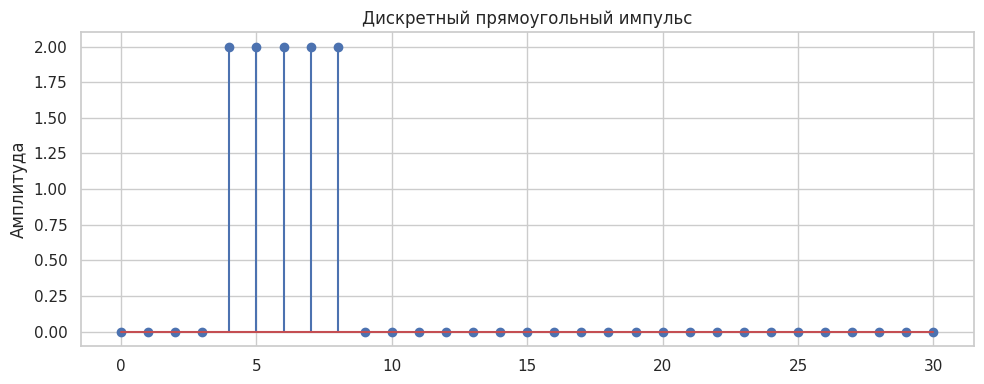

In [3]:
k = np.arange(0, N) # дискретное нормированное время до N-1
sigma_d_1 = np.array([1 if (x - n0) >= 0 else 0 for x in k]) # дискретный единичный скачок с задержкой n0
sigma_d_2 = np.array([1 if (x - n0 - n_imp + 1) >= 0 else 0 for x in k]) # дискретный единичный скачок с задержкой n0 + n_imp
s1 = U*(sigma_d_1 - sigma_d_2)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
plt.stem(k, s1, markerfmt="o")
plt.title('Дискретный прямоугольный импульс')
plt.ylabel('Амплитуда')
plt.tight_layout()

Моделирование импульса на основе $ \sigma_{d}(k) $ выполняется путем вычитания значения сигнала более позднего скачка из более раннего (чья задержка меньше в отсчетах), домножением разности на необходимое значение амплитуды.

### Задание №2
Смоделировать линейную комбинацию дискретных гармонических сигналов $ s_{2}(k)$:  
$ s_{2}(k) = a_{1}x_{1}(k) + a_{2}x_{2}(k) + a_{3}x_{3}(k)$,  
где  
$x_{i} = B_{i}sin( \widehat \omega_{i}k), i = 1,2,3 $

с выводом графиков последовательностей $ x_{i}(k) $ и $s_{2}(k)$ на интервале времени $ n \in [0, 5N - 1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности  $s_{2}(k)$ (идентификатор P).  
Пояснить:  
 a. операции при моделировании линейной комбинации сигналов $s_{2}(k)$  
 b. как определяют указанные характеристики.

In [4]:
# Вычисление значений амплитуды сигналов
k = np.arange(0, 5*N) # дискретное нормированное время до 5N-1
x1 = B1*np.cos(w1*k) # Первый гармонический сигнал
x2 = B2*np.cos(w2*k) # Второй гармонический сигнал
x3 = B3*np.cos(w3*k) # Третий гармонический сигнал
s2 = a1*x1 + a2*x2 + a3*x3 # Линейная комбинация сигналов xi, i = 1...3

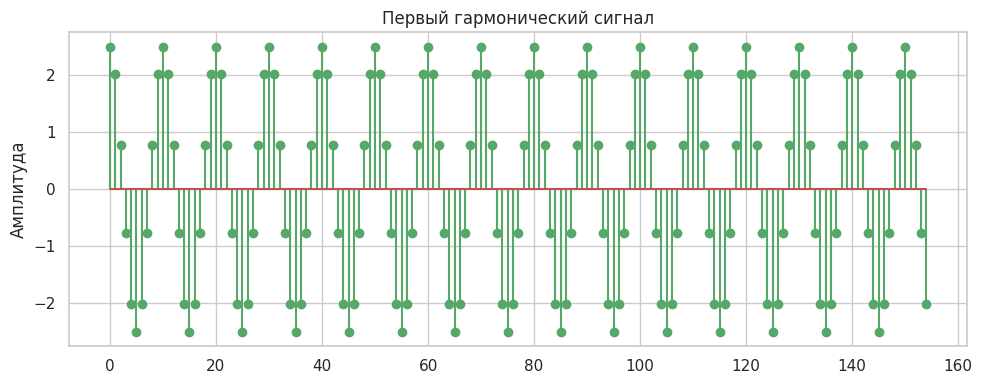

In [5]:
# График первого сигнала
plt.figure(figsize=(10, 4))
plt.stem(k, x1, 'g', markerfmt="go")
plt.title('Первый гармонический сигнал')
plt.ylabel('Амплитуда')
plt.tight_layout()

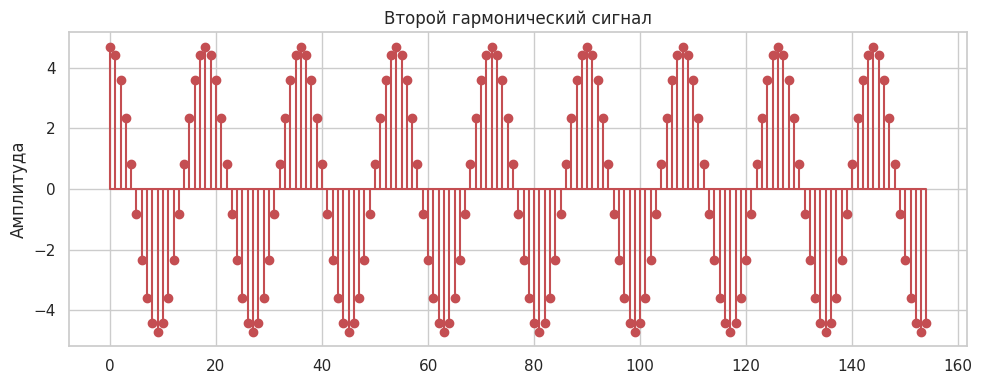

In [6]:
# График второго сигнала
plt.figure(figsize=(10, 4))
plt.stem(k, x2, 'r', markerfmt="ro")
plt.title('Второй гармонический сигнал')
plt.ylabel('Амплитуда')
plt.tight_layout()

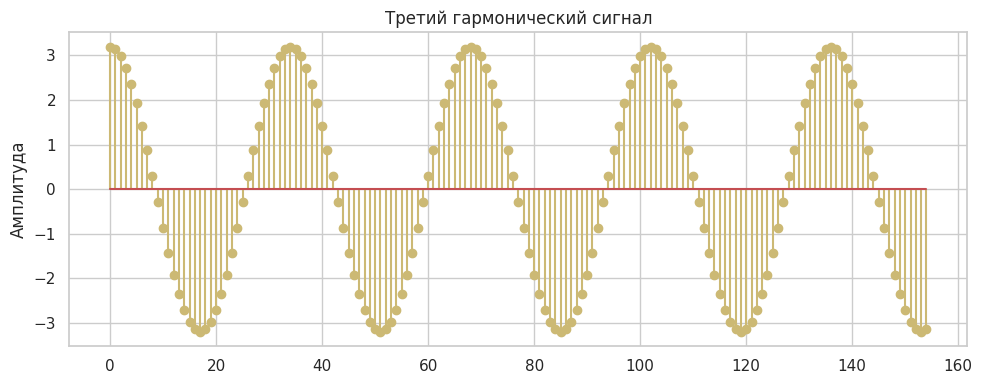

In [7]:
# График третьего сигнала
plt.figure(figsize=(10, 4))
plt.stem(k, x3, 'y', markerfmt="yo")
plt.title('Третий гармонический сигнал')
plt.ylabel('Амплитуда')
plt.tight_layout()

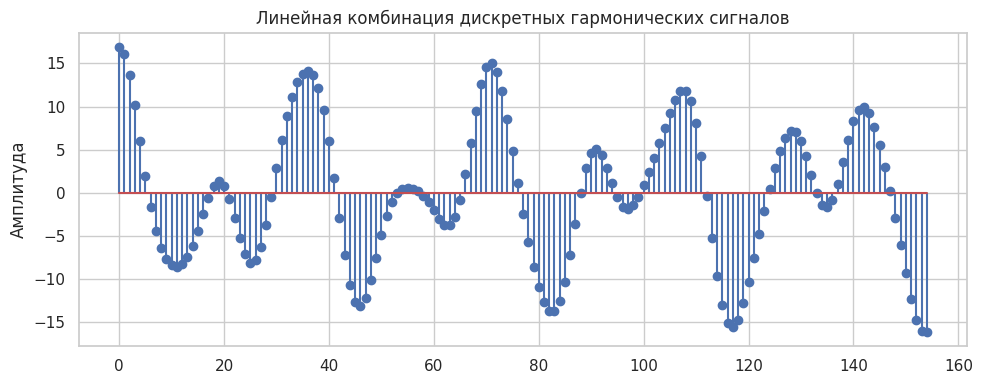

In [8]:
# График линейной комбинации
plt.figure(figsize=(10, 4))
plt.stem(k, s2, 'b', markerfmt="bo")
plt.title('Линейная комбинация дискретных гармонических сигналов')
plt.ylabel('Амплитуда')
plt.tight_layout()

In [9]:
Tk2 = np.lcm(np.lcm(2*(4 + Nb % 5), 2*(8 + Nb % 5)), 2*(16 + Nb % 5)) # - период линейной комбинации, НОК периодов входящих в неё сигналов
k = np.arange(0, Tk2)
mean_s2 = (sum([x for x in k ])) / Tk2
P = (sum([x**2 for x in k ])) / Tk2
E = sum([x**2 for x in k ])
print("mean_s2 = {}, P = {}, E = {}".format(mean_s2, P, E))

mean_s2 = 764.5, P = 779535.1666666666, E = 1192688805


a. Для моделирования линейной комбинации необходимо сначала получить значения сигналов, из которых состоит линейная комбинация, затем посчитать её значения в каждый отсчёт.  
b. Для подсчета необходимо посчитать период линейной комбинации, интегралы, но т.к. сигнал дискретный, необходимые характеристики являются результатом суммы соответсвующих значений линейной комбинации

### Задание №3
Вывести график дискретного сигнала $s_{3}(k)$ представляющего собой дискретный гармонический сигнал $ s(k)$  
$ s(k) = C cos( \widehat \omega_{0}k)$
с экспоненциальной огибающей $ \mid a \mid^{k}$, на интервале времени $ n \in [0, N-1] $. Привести аналитическую формулу дискретного сигнала $s_{3}(k)$ и пояснить операции при его моделировании.

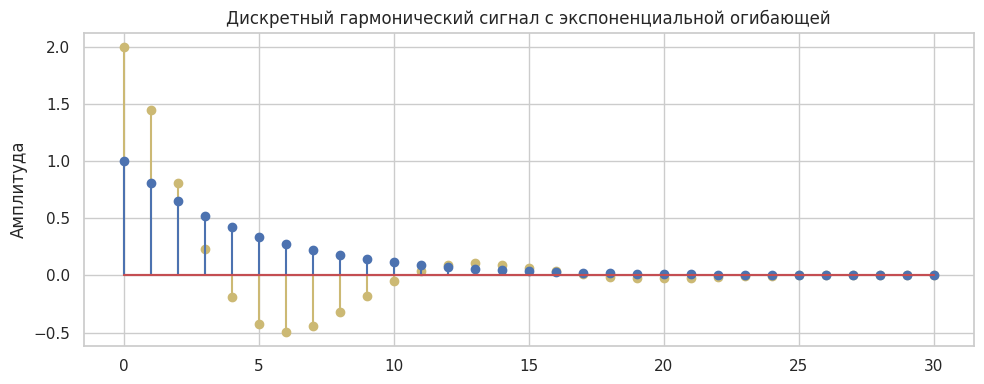

In [10]:
k = np.arange(0, N)
s3_2 = abs(a**k) # экспоненциальная огибающая
s3 = abs(a**k)*C*np.cos(w0*k)
plt.figure(figsize=(10, 4))
plt.stem(k, s3, 'y', markerfmt="yo")
plt.stem(k, s3_2, 'b', markerfmt="bo")
plt.title('Дискретный гармонический сигнал с экспоненциальной огибающей')
plt.ylabel('Амплитуда')
plt.tight_layout()

Аналитическая формула сигнала - $s_{3}(k)$ = $ \mid a \mid^{k} C cos( \widehat \omega_{0}k)$, для её получения необходимо домножить формулу сигнала на заданную степенную функцию.  
Для моделирования необходимо вычислить значения степенной функции, гармонического сигнала в отсчёт k, затем умножить их.

### Задание №4
Вывести график пяти периодов периодической последовательности $s_{4}(k)$ дискретных прямоугольных импульсов амплитуды U и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

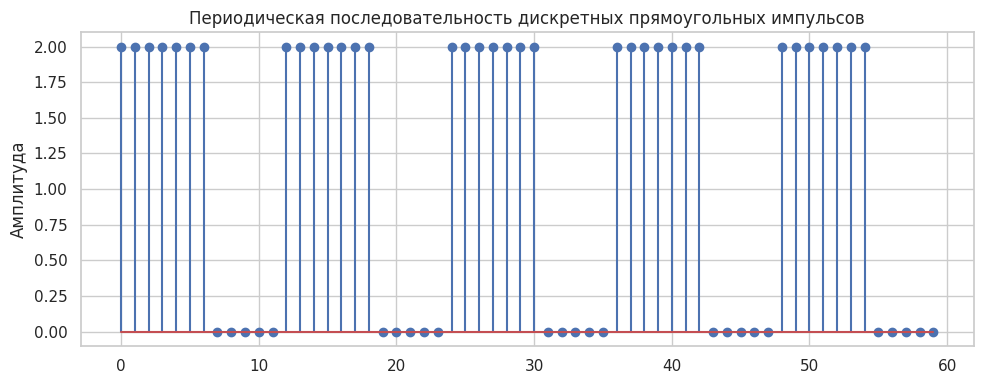

In [11]:
T = n_imp * 2 # период
k = np.arange(0, T*5) # дискретное нормированное время до T*5 - 1
s4 = U*np.array([1 if x % T <= n_imp else 0 for x in k])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
plt.stem(k, s4, markerfmt="o")
plt.title('Периодическая последовательность дискретных прямоугольных импульсов')
plt.ylabel('Амплитуда')
plt.tight_layout()

Период последовательности T равен n_imp*2 = 12. Для моделирования последовательности необходимо каждые T отсчётов моделировать прямоугольный импульс амплитуды U, который можно получить или с помощью разности соответствующих повторяющихся прямоугольных скачков, или с помощью проверки значения отсчета x : x % T <= n_imp - значение остатка отсчета по модулю периода должно быть меньше или равно длительности импульса.

## Выводы
В ходе выполнения лабораторной работы были изучены и смоделированы дискретный прямоугольный импульс, дискретный гармонический сигнал, дискретный гармонический сигнал с экспоненциальной огибающей, дискретный периодический прямоугольный импульс. Была смоделирована линейная комбинация дискретных гармонических сигналов, вычислена её энергия, среднее значение, среднее значение мощности.  
Для всех изученных сигналов проведено их моделирование и визуализация на интервалах дискретного нормированного времени.